In [2]:
import numpy
import pandas as pd
from datetime import datetime, timedelta, date
%matplotlib inline

Import CO2 data from Hawaii (dataset from: https://datahub.io/core/co2-ppm )

In [3]:
url="https://pkgstore.datahub.io/core/co2-ppm/co2-mm-mlo_csv/data/5d0e2bc9cc70b8dd8590a31d7ab4526b/co2-mm-mlo_csv.csv"
co2_data=pd.read_csv(url,parse_dates = ["Date"], index_col = "Date")

Show first lines of CO2 data:

In [4]:
co2_data.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,-99.99,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


Import global temperature data (original .csv file from https://www.kaggle.com/dmitriy19/some-visualizations-for-climate-change )

In [5]:
url="https://unidaplan.com/GlobalTemperatures.csv"
temperature_data=pd.read_csv(url, parse_dates=["dt"], index_col="dt")

Show first 5 lines

In [6]:
temperature_data.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Find boundaries of the datasets:

In [7]:
start_date = max ( co2_data.head(1).index.values[0], temperature_data.head(1).index.values[0] )
end_date   = min ( co2_data.tail(1).index.values[0], temperature_data.tail(1).index.values[0] )
climateIndex = pd.date_range(start=start_date, end=end_date, freq=pd.offsets.YearBegin(1)) 
co2_data2=co2_data.Interpolated[climateIndex]
temperature_data2 = temperature_data.LandAndOceanAverageTemperature[climateIndex]

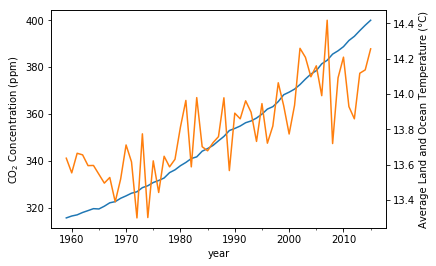

In [8]:
ax1=co2_data2.plot();
ax2=temperature_data2.plot(secondary_y=True);
ax1.set_xlabel("year");
ax1.set_ylabel("CO$_2$ Concentration (ppm)");
ax2.set_ylabel("Average Land and Ocean Temperature (°C)");

In [9]:
co2_data2.corr(temperature_data2)

0.7939510207491787